In [153]:
import numpy as np
import pandas as pd
import math
import statistics
import matplotlib.pyplot as plt

In [154]:
data_df = pd.read_csv("CSCI_1070_survey_results-2.csv")
data_df.head(20)

,Timestamp,What is your name?,What state/country were you born in?,Are you working while in school?,How much experience do you have programming?,What class are you in?,How many siblings do you have?,How many pets and of which kind do you have?,What is your favorite type of food?,Where do you live?,Do you take the metro?,What is your major?,How old are you?,What is your favorite TV show?,What is your favorite video game?,What is your favorite book?,Why are you taking this class?,Whats your favorite bash command?
0,2024/01/29 6:34:23 PM CST,Gavin Edwards,Missouri,Yes,6 months - 1 year,Freshman,1,I have two dogs both chihuahua mixes.,Pasta but fish is a close second.,On campus,No,Data Science,18,Breaking Bad,Rocket League,The Scythe series,Its a requirement for the data science major.,ls
1,2024/01/29 6:46:07 PM CST,NaN,"Saint Louis, Missouri",Yes,0-3 months,Freshman,2,0,Hot wings,Off campus,No,Nursing,19,Criminal Minds,Valorant,A Little life by Hanya Yanaghara,I have an interest in programming. I enjoy lea...,NaN
2,2024/01/29 7:45:39 PM CST,Connor Love,Illinois,No,0-3 months,Freshman,1,"I have two golden retrievers, Ellie and Amber....",Mexican.,On campus,No,Economics and Finance.,19,The Wire.,Pokémon White 2.,"""Surprised by Joy"" by C. S. Lewis.",Transfer course requirements for the Universit...,"<git push> by far, too satisfying."
3,2024/01/29 7:47:12 PM CST,Liam,Missouri,Yes,0-3 months,Freshman,1,0,Vietnamese,Off campus,No,Biochemistry,18,NaN,NaN,NaN,Applicability,NaN
4,2024/01/29 10:45:38 PM CST,Aarushi Choudhary,Japan,Yes,0-3 months,Freshman,1,No pets,Pasta,On campus,Yes,Health Sciences,18,NaN,Spiderman 2,NaN,I'm trying to get a minor in data science,ls
5,2024/01/29 10:55:40 PM CST,Noel Zerai,Missouri,Yes,0-3 months,Freshman,2,none,injera,On campus,No,comp sci,19,on my block,assassins creed origins,kite runner,just as an intro to my desired career.,ls
6,2024/01/29 11:50:50 PM CST,Kine Thiam,United States,Yes,0-3 months,Freshman,5+,0,PASTAAAAA,On campus,Yes,It was pre medicine therefore biology but I de...,18,Reign,It takes two,Wonder,At first it was to see if I’d like computer sc...,NaN
7,2024/01/30 5:24:37 PM CST,Bandar Aldhahri,Saudi Arabia,Yes,0-3 months,Junior,5+,0,Kabsa,Off campus,No,Criminology and Criminal Justice and I am plan...,NaN,Breaking Bad,FIFA - Soccer,NaN,I am planing to get a master degree in CyberSe...,until now is pwd
8,2024/01/31 10:44:53 AM CST,Aida Bah,Minnesota,Yes,0-3 months,Freshman,2,0,Gambian Food,On campus,Yes,Computer Science,18,NaN,NaN,Dead End Memories - Banana Yoshimoto,"For my major, to learn python",tree
9,2024/01/31 6:34:07 PM CST,Kevin Patel,India,No,0-3 months,Senior,0,NaN,Italian,Off campus,No,Finance,21,Peaky Blinders,Warzone,The Great Gatsby,To learn the basics of python to help me stand...,'cd'


In [ ]:
data_df.dtypes

Timestamp                                       object
What is your name?                              object
What state/country were you born in?            object
Are you working while in school?                object
How much experience do you have programming?    object
What class are you in?                          object
How many siblings do you have?                  object
How many pets and of which kind do you have?    object
What is your favorite type of food?             object
Where do you live?                              object
Do you take the metro?                          object
What is your major?                             object
How old are you?                                object
What is your favorite TV show?                  object
What is your favorite video game?               object
What is your favorite book?                     object
Why are you taking this class?                  object
Whats your favorite bash command?               object
dtype: obj

# 1

df['column']= np.where(df['column']== 'Yes','No',df['column'])
null value

In [ ]:
data_df.columns = ['Time','Name','Birthplace','Working','Experience','Class','Siblings','Pets','Food','Residence','Metro','Major','Age','TV','VideoGame','Book','Why?','Command']
data_df["Birthplace"]=data_df['Birthplace'].replace({'Missouri':'MO','Saint Louis, Missouri':'MO','Illinois':'IL','United States':'US','Japan':'JPN',
             'Saudi Arabia':'SARB','Minnesota':'MN','India':'IMD','New Mexico':'NM','United States, Missouri':'MO',
             'Missouri/U.S':'MO','Georgia, USA':'GA','Benghazi, Libya':'LBYA'})

data_df['Pets']= data_df['Pets'].replace({'I have two dogs both chihuahua mixes.':'Yes',
                                          'No pets':'No','none':'No','0':'No','NaN':'No',
                                          'We have a Husky named Maverick':'Yes','None ):':'No',
                                          '2 miniature daschund dogs':'Yes','1 Maincoon':'Yes',
                                          'My french bulldog just passed away a few months ago':'No','2 cats and 1 dog ':'Yes','No pets ':'No',})
data_df['Pets']= np.where(data_df['Pets'].str.contains('I have'),'No',data_df['Pets'])
data_df['Pets'].fillna("No", inplace=True)
data_df.head(21)

/var/folders/nh/jxnh82hs01v0q9hm7f66gq640000gn/T/ipykernel_77546/3748328079.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df['Pets'].fillna("No", inplace=True)


,Time,Name,Birthplace,Working,Experience,Class,Siblings,Pets,Food,Residence,Metro,Major,Age,TV,VideoGame,Book,Why?,Command
0,2024/01/29 6:34:23 PM CST,Gavin Edwards,MO,Yes,6 months - 1 year,Freshman,1,Yes,Pasta but fish is a close second.,On campus,No,Data Science,18,Breaking Bad,Rocket League,The Scythe series,Its a requirement for the data science major.,ls
1,2024/01/29 6:46:07 PM CST,NaN,MO,Yes,0-3 months,Freshman,2,No,Hot wings,Off campus,No,Nursing,19,Criminal Minds,Valorant,A Little life by Hanya Yanaghara,I have an interest in programming. I enjoy lea...,NaN
2,2024/01/29 7:45:39 PM CST,Connor Love,IL,No,0-3 months,Freshman,1,No,Mexican.,On campus,No,Economics and Finance.,19,The Wire.,Pokémon White 2.,"""Surprised by Joy"" by C. S. Lewis.",Transfer course requirements for the Universit...,"<git push> by far, too satisfying."
3,2024/01/29 7:47:12 PM CST,Liam,MO,Yes,0-3 months,Freshman,1,No,Vietnamese,Off campus,No,Biochemistry,18,NaN,NaN,NaN,Applicability,NaN
4,2024/01/29 10:45:38 PM CST,Aarushi Choudhary,JPN,Yes,0-3 months,Freshman,1,No,Pasta,On campus,Yes,Health Sciences,18,NaN,Spiderman 2,NaN,I'm trying to get a minor in data science,ls
5,2024/01/29 10:55:40 PM CST,Noel Zerai,MO,Yes,0-3 months,Freshman,2,No,injera,On campus,No,comp sci,19,on my block,assassins creed origins,kite runner,just as an intro to my desired career.,ls
6,2024/01/29 11:50:50 PM CST,Kine Thiam,US,Yes,0-3 months,Freshman,5+,No,PASTAAAAA,On campus,Yes,It was pre medicine therefore biology but I de...,18,Reign,It takes two,Wonder,At first it was to see if I’d like computer sc...,NaN
7,2024/01/30 5:24:37 PM CST,Bandar Aldhahri,SARB,Yes,0-3 months,Junior,5+,No,Kabsa,Off campus,No,Criminology and Criminal Justice and I am plan...,NaN,Breaking Bad,FIFA - Soccer,NaN,I am planing to get a master degree in CyberSe...,until now is pwd
8,2024/01/31 10:44:53 AM CST,Aida Bah,MN,Yes,0-3 months,Freshman,2,No,Gambian Food,On campus,Yes,Computer Science,18,NaN,NaN,Dead End Memories - Banana Yoshimoto,"For my major, to learn python",tree
9,2024/01/31 6:34:07 PM CST,Kevin Patel,IMD,No,0-3 months,Senior,0,No,Italian,Off campus,No,Finance,21,Peaky Blinders,Warzone,The Great Gatsby,To learn the basics of python to help me stand...,'cd'


In [ ]:
data_df['Food']= np.where(data_df['Food'].str.contains('Burger'),'American',data_df['Food'])
data_df['Food']= np.where(data_df['Food'].str.contains('Pasta'),'Italian',data_df['Food'])
data_df['Food']= np.where(data_df['Food'].str.contains('PASTAAAAA'),'Italian',data_df['Food'])
data_df['Food']= np.where(data_df['Food'].str.contains('Pizza'),'Italian',data_df['Food'])
data_df['Food']= np.where(data_df['Food'].str.contains('wings'),'American',data_df['Food'])
data_df['Food']= np.where(data_df['Food'].str.contains('Mexican'),'Mexican',data_df['Food'])
data_df['Food']= np.where(data_df['Food'].str.contains('injera'),'Ethiopian',data_df['Food'])
data_df['Food']= np.where(data_df['Food'].str.contains('steak'),'American',data_df['Food'])
data_df['Food']= np.where(data_df['Food'].str.contains('chicken'),'American',data_df['Food'])
data_df['Food']= np.where(data_df['Food'].str.contains('mexican'),'Mexican',data_df['Food'])
data_df['Food']= np.where(data_df['Food'].str.contains('Brownies'),'American',data_df['Food'])
data_df['Food']= np.where(data_df['Food'].str.contains('Kabsa'),'Middle Eastern',data_df['Food'])
data_df['Food']= np.where(data_df['Food'].str.contains('Gambian Food'),'Gambian',data_df['Food'])
data_df['Food']= np.where(data_df['Food'].str.contains('salmon'),'SeaFood',data_df['Food'])
data_df['Food']= np.where(data_df['Food'].str.contains('pasta'),'Italian',data_df['Food'])
data_df.head()

,Time,Name,Birthplace,Working,Experience,Class,Siblings,Pets,Food,Residence,Metro,Major,Age,TV,VideoGame,Book,Why?,Command
0,2024/01/29 6:34:23 PM CST,Gavin Edwards,MO,Yes,6 months - 1 year,Freshman,1,Yes,Italian,On campus,No,Data Science,18,Breaking Bad,Rocket League,The Scythe series,Its a requirement for the data science major.,ls
1,2024/01/29 6:46:07 PM CST,NaN,MO,Yes,0-3 months,Freshman,2,No,American,Off campus,No,Nursing,19,Criminal Minds,Valorant,A Little life by Hanya Yanaghara,I have an interest in programming. I enjoy lea...,NaN
2,2024/01/29 7:45:39 PM CST,Connor Love,IL,No,0-3 months,Freshman,1,No,Mexican,On campus,No,Economics and Finance.,19,The Wire.,Pokémon White 2.,"""Surprised by Joy"" by C. S. Lewis.",Transfer course requirements for the Universit...,"<git push> by far, too satisfying."
3,2024/01/29 7:47:12 PM CST,Liam,MO,Yes,0-3 months,Freshman,1,No,Vietnamese,Off campus,No,Biochemistry,18,NaN,NaN,NaN,Applicability,NaN
4,2024/01/29 10:45:38 PM CST,Aarushi Choudhary,JPN,Yes,0-3 months,Freshman,1,No,Italian,On campus,Yes,Health Sciences,18,NaN,Spiderman 2,NaN,I'm trying to get a minor in data science,ls


In [ ]:
data_df['Major']= data_df['Major'].str.replace('.','')
data_df['Major']= data_df['Major'].str.lower()
data_df['Major']= np.where(data_df['Major'].str.contains('it was pre'),'computer science',data_df['Major'])
data_df['Major']= np.where(data_df['Major'].str.contains('comp'),'computer science',data_df['Major'])
data_df['Major']= np.where(data_df['Major'].str.contains('it was pre'),'computer science',data_df['Major'])
data_df['Major']= np.where(data_df['Major'].str.contains('i am plan'),'criminal Justice',data_df['Major'])
data_df['Age']= np.where(data_df['Age'].str.contains('turning'),'19',data_df['Age'])
data_df['Age']= np.where(data_df['Age'].str.contains('years'),'18',data_df['Age'])
data_df.head(21)

,Time,Name,Birthplace,Working,Experience,Class,Siblings,Pets,Food,Residence,Metro,Major,Age,TV,VideoGame,Book,Why?,Command
0,2024/01/29 6:34:23 PM CST,Gavin Edwards,MO,Yes,6 months - 1 year,Freshman,1,Yes,Italian,On campus,No,data science,18,Breaking Bad,Rocket League,The Scythe series,Its a requirement for the data science major.,ls
1,2024/01/29 6:46:07 PM CST,NaN,MO,Yes,0-3 months,Freshman,2,No,American,Off campus,No,nursing,19,Criminal Minds,Valorant,A Little life by Hanya Yanaghara,I have an interest in programming. I enjoy lea...,NaN
2,2024/01/29 7:45:39 PM CST,Connor Love,IL,No,0-3 months,Freshman,1,No,Mexican,On campus,No,economics and finance,19,The Wire.,Pokémon White 2.,"""Surprised by Joy"" by C. S. Lewis.",Transfer course requirements for the Universit...,"<git push> by far, too satisfying."
3,2024/01/29 7:47:12 PM CST,Liam,MO,Yes,0-3 months,Freshman,1,No,Vietnamese,Off campus,No,biochemistry,18,NaN,NaN,NaN,Applicability,NaN
4,2024/01/29 10:45:38 PM CST,Aarushi Choudhary,JPN,Yes,0-3 months,Freshman,1,No,Italian,On campus,Yes,health sciences,18,NaN,Spiderman 2,NaN,I'm trying to get a minor in data science,ls
5,2024/01/29 10:55:40 PM CST,Noel Zerai,MO,Yes,0-3 months,Freshman,2,No,Ethiopian,On campus,No,computer science,19,on my block,assassins creed origins,kite runner,just as an intro to my desired career.,ls
6,2024/01/29 11:50:50 PM CST,Kine Thiam,US,Yes,0-3 months,Freshman,5+,No,Italian,On campus,Yes,computer science,18,Reign,It takes two,Wonder,At first it was to see if I’d like computer sc...,NaN
7,2024/01/30 5:24:37 PM CST,Bandar Aldhahri,SARB,Yes,0-3 months,Junior,5+,No,Middle Eastern,Off campus,No,criminal Justice,19,Breaking Bad,FIFA - Soccer,NaN,I am planing to get a master degree in CyberSe...,until now is pwd
8,2024/01/31 10:44:53 AM CST,Aida Bah,MN,Yes,0-3 months,Freshman,2,No,Gambian,On campus,Yes,computer science,18,NaN,NaN,Dead End Memories - Banana Yoshimoto,"For my major, to learn python",tree
9,2024/01/31 6:34:07 PM CST,Kevin Patel,IMD,No,0-3 months,Senior,0,No,Italian,Off campus,No,finance,21,Peaky Blinders,Warzone,The Great Gatsby,To learn the basics of python to help me stand...,'cd'


# 2

Text(0, -1.25, 'This pie chart shows the age distribution of our class.')

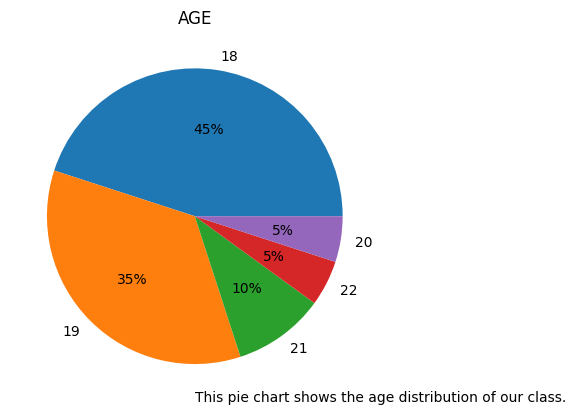

In [ ]:
data_df['Age'].value_counts().plot.pie(autopct = '%1.0f%%')
plt.title('AGE')
plt.ylabel('')
plt.xlabel('')
plt.text(0, -1.25,"This pie chart shows the age distribution of our class.")


Text(0.25, -1.25, 'Shows how many students have pets.')

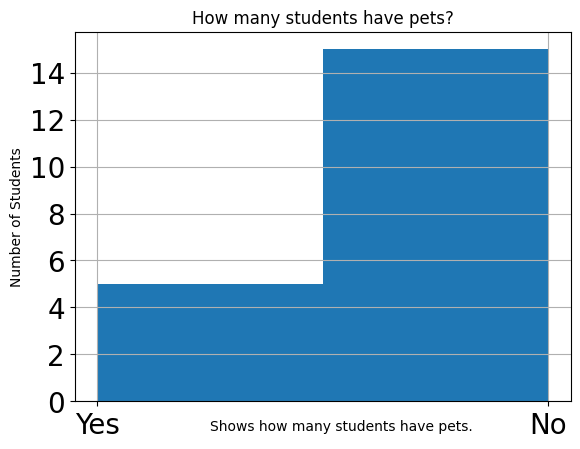

In [ ]:
data_df['Pets'].hist(bins=2)
plt.title('How many students have pets?')
plt.ylabel('Number of Students')
plt.xlabel('')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.text(0.25, -1.25,"Shows how many students have pets.")

Text(0, -1, 'This scatter plot show the relationship between class and age.')

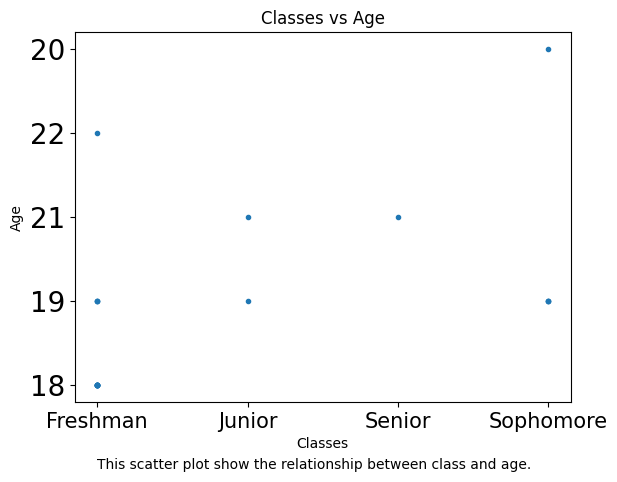

In [ ]:
plt.plot(data_df['Class'],data_df['Age'],'.')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 20)
plt.title('Classes vs Age')
plt.ylabel('Age')
plt.xlabel('Classes')
plt.text(0, -1,"This scatter plot show the relationship between class and age.")

Text(0, -1.35, 'This pie chart shows the class distribution of our class.')

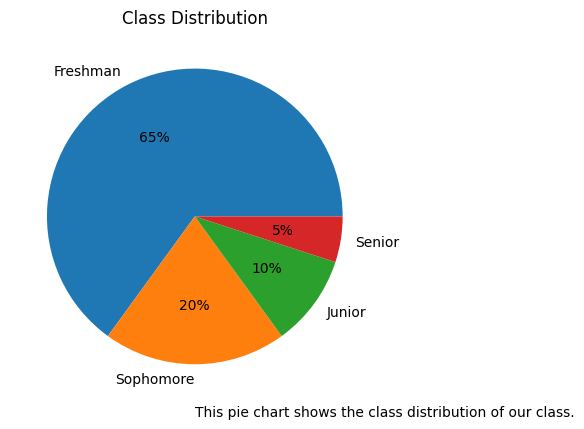

In [ ]:
data_df['Class'].value_counts().plot.pie(autopct = '%1.0f%%')
plt.title('Class Distribution')
plt.ylabel('')
plt.xlabel('')
plt.text(0, -1.35,"This pie chart shows the class distribution of our class.")

Text(0, -1.35, 'This pie chart shows the classdistribution based on food.')

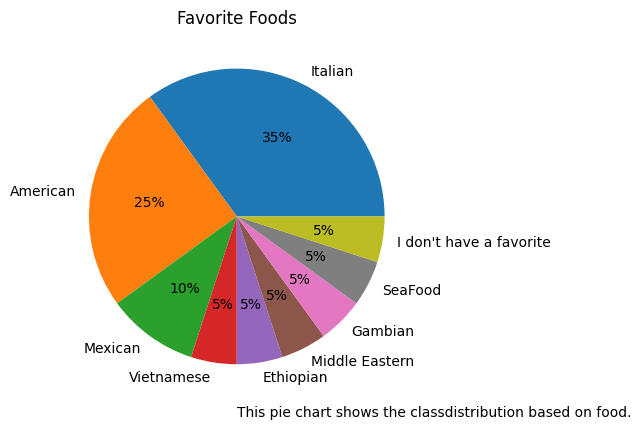

In [ ]:
data_df['Food'].value_counts().plot.pie(autopct = '%1.0f%%')
plt.title('Favorite Foods')
plt.ylabel('')
plt.xlabel('')
plt.text(0, -1.35,"This pie chart shows the classdistribution based on food.")